/Users/knaegle/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


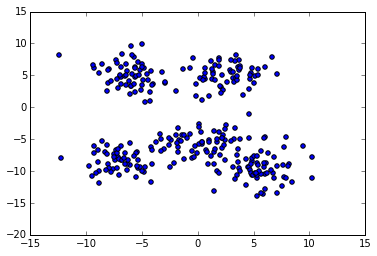

In [1]:
############################################################################
# OpenEnsemble Project													   #
# Demonstration of hierarchical clustering linkage on Guassian Toy from Ronan et al. Sci Sig 2016 #
############################################################################
#comment this to suppress showing in notebooks
%matplotlib inline 


import numpy as np 
import pandas as pd 
from sklearn import datasets
import openensembles as oe
import matplotlib.pyplot as plt
import pylab
import scipy.cluster.hierarchy as sch

#set up dataset
np.random.seed(0)
n_samples = 300
blobs = datasets.make_blobs(n_samples=n_samples, random_state=10,centers=5,cluster_std=2)
X, y = blobs

#check the data by plotting the two dimensions
plt.scatter(X[:,0], X[:,1])


In [11]:
# Setup the open ensembles data object

df = pd.DataFrame(X)
#create an open ensembles data object from the dataframe
dataObj = oe.data(df, [1,2])

In [14]:
dataObj.transform('parent', 'log', 'log_parent', base=10)

/Users/knaegle/GIT/openensembles.main/openensembles.py:167: UserWarning: WARNING: transformation log resulted in 329 NaN values


In [15]:
dataObj.D

{'log_parent': array([[ 0.776157  ,         nan],
        [        nan,         nan],
        [ 0.70835821,  0.6869075 ],
        [ 0.08301834,         nan],
        [        nan,         nan],
        [        nan,  0.67210279],
        [        nan,  0.98283848],
        [ 0.77904023,         nan],
        [        nan,  0.88455129],
        [ 0.60732355,  0.28101977],
        [ 0.82910273,         nan],
        [        nan,  0.87096688],
        [        nan,  0.89917419],
        [ 0.76796751,         nan],
        [-0.52585843,         nan],
        [        nan,  0.79243878],
        [ 0.3422166 ,  0.70677306],
        [        nan,         nan],
        [        nan,         nan],
        [        nan,         nan],
        [        nan,  0.53123879],
        [ 0.15568671,         nan],
        [-0.00966379,         nan],
        [-0.96761018,         nan],
        [        nan,  0.51470748],
        [        nan,         nan],
        [        nan,         nan],
        [     

In [11]:
dataObj.plot_data('log_parent')

TypeError: Required argument 'object' (pos 1) not found

In [13]:
fig=plt.figure(figsize=(5,5))
plot_num=1
dataObj.plot_data('parent', fignum=plot_num)

TypeError: Required argument 'object' (pos 1) not found

In [4]:
# Now create a complete linkage clustering of the data

#construct the cluster object
c = oe.cluster(dataObj)


In [5]:
c.algorithms_available()

{'AffinityPropagation': '',
 'DBSCAN': '',
 'agglomerative': '',
 'kmeans': '',
 'spectral': ''}

In [6]:
#agglomerative clustering with complete linkage

algorithm = 'agglomerative'
k = 5
linkageType = 'complete'
name = algorithm+'_'+linkage+'_'+str(k)

#here is where you set variable arguments specific to the algorithm
params = {}
params['linkage'] = linkage
c.cluster('parent', algorithm, name, k, params)
c.cluster('parent', algorithm, name, k, linkage=linkageType)

In [7]:
c.labels

{'agglomerative_complete_5': array([4, 0, 3, 0, 2, 1, 1, 4, 3, 3, 4, 1, 1, 4, 0, 3, 3, 2, 0, 2, 1, 0, 0,
        0, 1, 2, 2, 1, 0, 2, 3, 4, 1, 4, 0, 3, 3, 3, 1, 3, 3, 4, 2, 3, 2, 4,
        2, 1, 0, 2, 0, 3, 0, 4, 0, 0, 3, 3, 1, 0, 3, 0, 1, 3, 0, 4, 2, 1, 1,
        2, 3, 2, 1, 3, 2, 2, 1, 2, 0, 0, 2, 0, 0, 4, 3, 0, 1, 1, 4, 3, 1, 0,
        0, 1, 3, 4, 1, 1, 1, 4, 4, 2, 0, 2, 3, 3, 2, 3, 4, 4, 3, 0, 2, 1, 0,
        4, 3, 1, 0, 2, 0, 1, 3, 2, 0, 4, 0, 3, 2, 0, 4, 4, 2, 0, 1, 4, 3, 3,
        3, 1, 1, 4, 1, 0, 4, 0, 4, 0, 4, 4, 2, 3, 0, 3, 4, 2, 4, 1, 3, 2, 1,
        2, 3, 0, 0, 1, 1, 2, 1, 0, 1, 3, 0, 0, 2, 3, 2, 1, 2, 4, 3, 0, 4, 0,
        0, 2, 4, 3, 0, 3, 4, 2, 4, 1, 1, 1, 1, 0, 4, 4, 2, 1, 2, 0, 1, 4, 1,
        0, 0, 1, 4, 1, 2, 0, 4, 0, 1, 1, 1, 3, 3, 1, 0, 1, 0, 3, 3, 2, 2, 3,
        3, 4, 3, 3, 2, 4, 3, 0, 3, 2, 2, 0, 4, 4, 2, 3, 4, 3, 4, 2, 4, 2, 4,
        2, 0, 4, 1, 4, 4, 0, 4, 0, 3, 4, 1, 3, 3, 1, 4, 2, 0, 0, 3, 0, 0, 0,
        1, 2, 2, 4, 0, 2, 1, 1, 0, 1, 4, 2, 4, 1

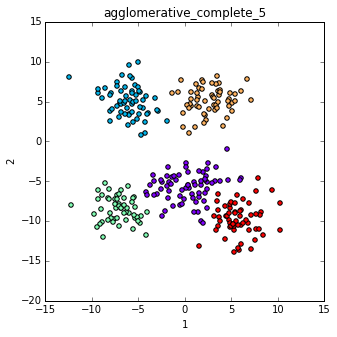

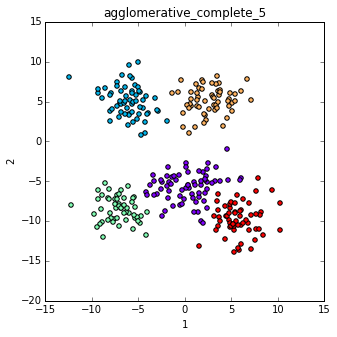

In [8]:
#plot the data, coloring classes according to the solution of the desired name. 
fig=plt.figure(figsize=(5,5))
plot_num+=1
dataObj.plot_data('parent', fignum=plot_num, title=name, class_labels=c.labels[name])

# Directly call sklearn in order to plot heatmap of data and dendrograms 

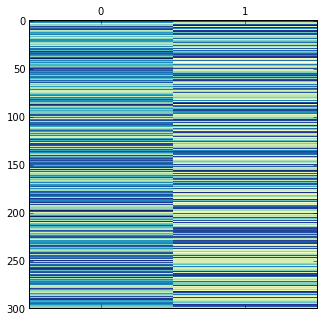

In [9]:
#first, what does the unsorted matrix look like
fig=plt.figure(figsize=(5,5))
axmatrix = fig.add_axes([0.10,0,0.80,0.80])
im = axmatrix.matshow(X, cmap=pylab.cm.YlGnBu, aspect='auto')#, aspect=’auto’, origin=’lower’, cmap=pylab.cm.YlGnBu)


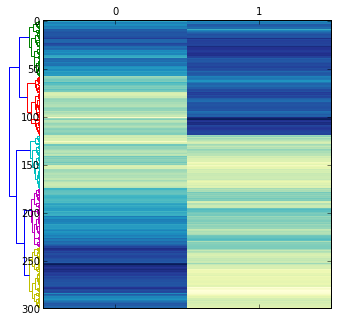

In [10]:
# now calculate the linkages, which gives you an order and a dendrogram
fig=plt.figure(figsize=(5,5))

#dendrogram axes are added and calculated
ax1 = fig.add_axes([0,0,0.09,0.80])
dendrogram_distance=12 #this sets the color threshold and shows you where cuts can be made at what linkage length

#calculate linkage and get a dendrogram object
Y = sch.linkage(X, method=linkage)
Z1 = sch.dendrogram(Y, orientation='right', color_threshold=dendrogram_distance)

ax1 = fig.add_axes([0,0,0.09,0.80])
ax1.set_xticks([])
ax1.set_yticks([])
fig.gca().invert_yaxis() # this plus the y-axis invert in the heatmap flips the y-axis heatmap orientation
ax1.axis('off')


idx1 = Z1['leaves'] #index ordering of the dendrogram
sorted_X = X[idx1,:] 
axmatrix = fig.add_axes([0.10,0,0.80,0.80])
im = axmatrix.matshow(sorted_X, cmap=pylab.cm.YlGnBu, aspect='auto') #now plotting with an ordered sort
